# K-Nearest Neighbor (KNN) Project
---



## Project Guide
---
- [Project Overview](#project-overview)  
- [Part 1: Acquire, Explore, and Preprocess Data](#part1)
- [Part 2: Code KNN](#part2)  
    -[KNN in sklearn](#sklearn)
- [Part 3: Interpret Results](#part3)


<a id="project-overview"></a>
## Project Overview
---
#### EXPECTED TIME: 3 HRS  

This project has 3 parts:

- Part 1: Familiarize yourself with the problem and data
- Part 2: Code a KNN Classifier from scratch, evaluate performance, and compare to Scikit-Learn's implementation
- Part 3: Interpret results and explain findings.

This will include:
- Answering simple questions regarding the data  
- Manipulating multiple DataFrames  
- Coding functions to:  
    - Calculate Euclidean distance
    - Calculate distance between many pairs of points
    - Implement a majority voting system
    - Combine the above to create a custom KNN algorithm
- Use `KNeighborsClassifier` in `sklearn`  

**Motivation**: KNN is a reasonably simple algorithm that is easy to grasp and can be very effective.

**Objectives**: By the end of this assignment, you will:
- Have a firm understanding of the KNN algorithm
- Have practiced running through the data science workflow to solve a problem
- Will demonstate how to translate a mathematical algorithm into effective code
- Understand common pitfalls when working with distances

**Problem**: Classify the type of activity a person is performing based on measurements collected from a smartphone. The activities include:  
- Walking
- Walking_Upstairs
- Walking_Downstairs
- Sitting
- Standing
- Laying


**Dataset**: [_Human Activity Recognition Using Smartphones Data Set_](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) from the UC Irvine Machine Learning Repositiory.  

Dataset description as provided in the original authors:

---
```
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details. 

For each record it is provided:
======================================

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who carried out the experiment.
```

Please see the [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/) to explore the data files further.

---

<a id="part1"></a>
## Part 1: Acquire, Explore, and Preprocess Data
---

### Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in the training data

In [2]:
FEATURE_NAMES = '../resource/asnlib/publicdata/features.txt'
TRAIN_DATA = '../resource/asnlib/publicdata/X_train.txt'
TRAIN_LABELS = '../resource/asnlib/publicdata/y_train.txt'

In [3]:
# read feature names
feats = pd.read_table(FEATURE_NAMES, sep='\n', header=None)

# read in training data
har_train = pd.read_table(TRAIN_DATA, sep='\s+', header=None)

# read in training labels
har_train_labels = pd.read_table(TRAIN_LABELS, sep='\n', header=None, names=["label"], squeeze = True)

### Explore the Data

**Print out the first five rows of the training data (`har_train`) -- does everything look okay?**

In [4]:
har_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [9]:
har_train_labels.head()

0    5
1    5
2    5
3    5
4    5
Name: label, dtype: int64

#### Question 1
How many rows and columns are in `har_train`?


In [10]:
### GRADED

### Find out how many rows and columns are in har_train
### Assign the tuple of (<rows>, <cols>) to ans1
### For your reference you may also want to print out the nubmer of rows and columns

### YOUR ANSWER BELOW
print(har_train.shape)
ans1 = (7352, 561)

(7352, 561)


In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Print the first 5 rows of `feats` - the DataFrame of feature names.**

In [12]:
feats.head()

,0
0,1 tBodyAcc-mean()-X
1,2 tBodyAcc-mean()-Y
2,3 tBodyAcc-mean()-Z
3,4 tBodyAcc-std()-X
4,5 tBodyAcc-std()-Y


In [14]:
feats.iloc[:,0]

0                           1 tBodyAcc-mean()-X
1                           2 tBodyAcc-mean()-Y
2                           3 tBodyAcc-mean()-Z
3                            4 tBodyAcc-std()-X
4                            5 tBodyAcc-std()-Y
5                            6 tBodyAcc-std()-Z
6                            7 tBodyAcc-mad()-X
7                            8 tBodyAcc-mad()-Y
8                            9 tBodyAcc-mad()-Z
9                           10 tBodyAcc-max()-X
10                          11 tBodyAcc-max()-Y
11                          12 tBodyAcc-max()-Z
12                          13 tBodyAcc-min()-X
13                          14 tBodyAcc-min()-Y
14                          15 tBodyAcc-min()-Z
15                            16 tBodyAcc-sma()
16                       17 tBodyAcc-energy()-X
17                       18 tBodyAcc-energy()-Y
18                       19 tBodyAcc-energy()-Z
19                          20 tBodyAcc-iqr()-X
20                          21 tBodyAcc-


**Change the names of columns via the `.columns` attribute**

In [15]:
har_train.columns = feats.iloc[:,0]
har_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [17]:
har_train.isnull().values.sum()

0

#### Question 2
Are there missing values?


In [18]:
### GRADED
### How many "null" values are in the `har_train` dataframe
### Assign int answer to ans1

### YOUR ANSWER BELOW

ans1 = 0

In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Plot the correlation plot of the first 20 features (`har_train.iloc[:, :20])` with `seaborn`.**

- Seaborn: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

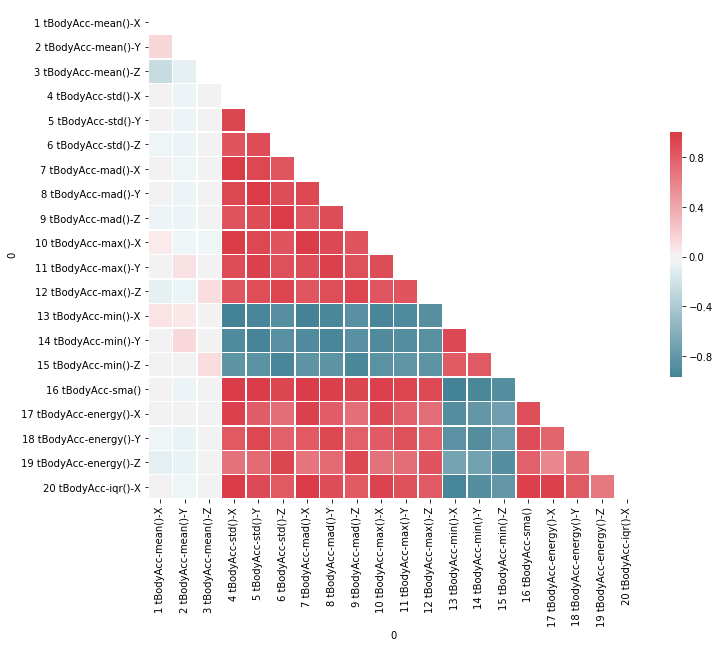

In [30]:
# seaborn
first_twenty = har_train.iloc[:, :20] # pull out first 20 feats
#print(first_twenty)
corr = first_twenty.corr()  # compute correlation matrix
#print('-----')
#print(corr)
mask = np.zeros_like(corr, dtype=np.bool)  # make mask
#print(mask)
mask[np.triu_indices_from(mask)] = True  # mask the upper triangle
#print(mask)
fig, ax = plt.subplots(figsize=(11, 9))  # create a figure and a subplot
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidth=0.5,
    cbar_kws={'shrink': 0.5}
);

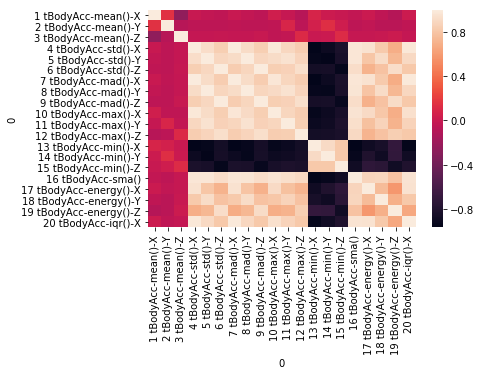

In [32]:
first_twenty = har_train.iloc[:, :20] # pull out first 20 feats
corr = first_twenty.corr()  # compute correlation matrix
sns.heatmap(corr)

#### Question 3

In [33]:
### GRADED
### In looking at the graphic above:
### True or False:
### In these first 20 features, some are  highly correlated. e.g. With correlation >0.5 or < -0.5?
### Assign boolean answer to ans1

### YOUR ANSWER BELOW

ans1 = True

In [34]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


EDA, as was performed (briefly) above is used to develop an idea of potential problems with data. Particularly with modeling, looking for Null / impossible values, and correlated features are important steps to:  
1. See if any features will not be useful in models becuase of null values.
2. See if any model assumptions are violated by correlated features (such as in linear / logistic regression)

**Switching to the target variable (`har_train_labels`).**

#### Question 4
Investigate class sizes - are they unbalanced?

In [29]:
### GRADED
### How many times does the majority class appear in our data?
### How many times does the minority class appear in our data?
### Assign int to ans_maj and ans_min
### YOUR ANSWER BELOW

ans_maj = 1407
ans_min = 986

In [35]:
#sku
har_train_labels.value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: label, dtype: int64

In [36]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


While the activities are not perfectly represented equally, its fairly close.  
A large imbalance in the distribution of the target variable categories can cause machine learning algorithms to train themselves well with the majority class, and perform poorly on the minority class.

**Use the `.describe()` method along with `.groupby()` method to compare the statistics within each activity.**

In [37]:
# concatenate the target variable
# give target and observations conventional names
y = har_train_labels 
X = har_train

data = pd.concat([X, y], axis=1)
data.shape 

(7352, 562)

In [41]:
# group by the 'label' and show descriptive stats
data.groupby('label').agg(['count', 'mean','std','min','max','median']).T.head(20)

label                                 1            2           3            4  \
1 tBodyAcc-mean()-X count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean       0.276260     0.261930    0.288169     0.273449   
                    std        0.050353     0.078029    0.095101     0.041998   
                    min        0.121465    -0.061041   -0.161088    -0.412659   
                    max        0.433256     0.480180    0.617597     0.559135   
                    median     0.274582     0.266666    0.284955     0.277306   
2 tBodyAcc-mean()-Y count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.017768    -0.026647   -0.016370    -0.012143   
                    std        0.020880     0.037038    0.027057     0.032421   
                    min       -0.127407    -0.183885   -0.094826    -0.121073   
                    max        0.071488     0.100904    0.099755     0.324130   
                    median    -0.017867    -0.023000   -0.017714    -0.016457   
3 tBodyAcc-mean()-Z count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.108884    -0.120424   -0.105860    -0.106581   
                    std        0.032436     0.060204    0.050656     0.045323   
                    min       -0.285675    -0.403290   -0.289816    -0.560934   
                    max        0.006195     0.142537    0.091229     0.280939   
                    median    -0.110424    -0.113635   -0.109039    -0.108125   
4 tBodyAcc-std()-X  count   1226.000000  1073.000000  986.000000  1286.000000   
                    mean      -0.312641    -0.221072    0.139847    -0.983450   

label                                 5            6  
1 tBodyAcc-mean()-X count   1374.000000  1407.000000  
                    mean       0.279294     0.269191  
                    std        0.020097     0.101541  
                    min        0.111231    -1.000000  
                    max        0.631510     1.000000  
                    median     0.277507     0.276946  
2 tBodyAcc-mean()-Y count   1374.000000  1407.000000  
                    mean      -0.016123    -0.018345  
                    std        0.017846     0.073512  
                    min       -0.116007    -1.000000  
                    max        0.212768     1.000000  
                    median    -0.017097    -0.017364  
3 tBodyAcc-mean()-Z count   1374.000000  1407.000000  
                    mean      -0.107330    -0.107169  
                    std        0.035680     0.089743  
                    min       -0.509645    -1.000000  
                    max        0.267377     1.000000  
                    median    -0.108771    -0.108104  
4 tBodyAcc-std()-X  count   1374.000000  1407.000000  
                    mean      -0.985346    -0.959475

In [43]:
# SKU
new_df = pd.DataFrame(data.groupby('label').agg([ 'mean']).T.head(20))
new_df.sort_values(2)

,label,1,2,3,4,5,6
18 tBodyAcc-energy()-Y,mean,-0.807476,-0.796374,-0.762459,-0.993840,-0.997131,-0.985202
17 tBodyAcc-energy()-X,mean,-0.751585,-0.682288,-0.323685,-0.998918,-0.999489,-0.993847
19 tBodyAcc-energy()-Z,mean,-0.720790,-0.632832,-0.653749,-0.988684,-0.992459,-0.977828
20 tBodyAcc-iqr()-X,mean,-0.422701,-0.398548,-0.096000,-0.987747,-0.990633,-0.966171
7 tBodyAcc-mad()-X,mean,-0.350317,-0.279919,0.073157,-0.985281,-0.987893,-0.961890
12 tBodyAcc-max()-Z,mean,-0.302737,-0.260591,-0.250321,-0.786459,-0.787666,-0.785164
4 tBodyAcc-std()-X,mean,-0.312641,-0.221072,0.139847,-0.983450,-0.985346,-0.959475
6 tBodyAcc-std()-Z,mean,-0.246279,-0.140364,-0.168368,-0.939274,-0.942360,-0.941635
9 tBodyAcc-mad()-Z,mean,-0.249564,-0.132670,-0.190944,-0.936903,-0.940217,-0.940378
3 tBodyAcc-mean()-Z,mean,-0.108884,-0.120424,-0.105860,-0.106581,-0.107330,-0.107169


**Summary**:  
EDA should be tailored to your specific problem - to help develop and understanding of the data for a particular purpose. This is time consuming process when the data are large with many features. It's subject matter experts can guide initial explorations.  

The above are examples of just a few of the things EDA should include when starting a project.

With a feel for the data, now we will aside a "test" data-set that will allow us to evaluate out models.  

`train_test_split` from `sklearn.model_selection` module provides an easy way to do this.  

Setting `test_size=.3` and `random_state=24`.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

In [40]:
#sku C


#### Question 5

In [46]:
### GRADED
### `test_size = .3` means:

### 'a') the final 30% of the data is held out for the test data
### 'b') any observations with ".3" are held out
### 'c') a random 30% of the data are held out
### 'd') a random 70% of the data are held out
### assign character associated with your choice to ans1 as a string

### YOUR ANSWER BELOW

ans1 = 'c'

In [47]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="part2"></a>
## Part 2: Code KNN

Note: The following was adapted from example 2.1.2 in Chapter 2 of [_Machine Learning in Action_ by Peter Harrington](https://www.manning.com/books/machine-learning-in-action).

Before fitting a KNN model using built in functionality in the `sklearn` package, we will code our own version of KNN.  

Given a value (with our movement-data, this "value" is better thought of as a vector of values) to be classified, KNN calculates the distance between that value and all other values in the training data-set. Then, the "`k`" nearest neighbors are polled as to their "label", and the given value is predicted to be of that majority value.  

Thus we need to:

**Create a function that accepts the following parameters:**  
- A single data point to be classified (`input_vector`)
- Training data (`X_train`)   
- Labels for training data
- Value for k (some positive integer)
- Optional: Similarity Metric (Euclidean or Cosine)- This exercise will use [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) for simplicity.  


**Function Signature:**  
`def my_knn(input_vector, X_train, y_train, k, [metric])`  

**Pseudo Code:**  
```
for every point in our dataset:
    calculate the distance between the current point and input_vector
    sort the distances in increasing order
    take k items with lowest disances to input_vector
    find the majority class among these items
    return the majority class label from the k closest neighbors
```

**Return:**   
- The prediction for `input_vector`  

#### Question 6

In [48]:
### GRADED
### This exercise will use Euclidean distances.  
### Please find the Euclidean distance between the points (1,2,3,-4,6) and (10,2,32,-2,0)
### Assign distance as number to ans1
### YOUR ANSWER BELOW

p1 = (1,2,3,-4,6)
p2 = (10,2,32,-2,0)
dist = 0
for a,b in zip(p1,p2):
    dist += (a-b)**2
euclideand = dist**0.5 # **0.5 mean squre root
print(euclideand)
ans1 = euclideand 

31.016124838541646


In [54]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 7

In [55]:
### GRADED
### Code a function called "euclid_dist" 

### ACCEPT two inputs, points, represented as tuples in the format, (a1, b1,...n1), (a2, b2, ...n2).
### RETURN the euclidean distance

### Remember: "**" is the python operator for exponents.

### YOUR ANSWER BELOW

def euclid_dist(p1, p2):
    """
    Calculate the Euclidian Distance between two points
    
    Positional Arguments:
        p1 -- A tuple of n numbers
        p2 -- A tuple of n numbers
    
    Example:
        p1 = (5,5)
        p2 = (0,0)
        p3 = (5,6,7,8,9,10)
        p4 = (1,2,3,4,5,6)
        print(euclid_dist(p1,p2)) #--> 7.0710678118654755
        print(euclid_dist(p3,p4)) #--> 9.797958971132712
    """
    dist = 0
    for a,b in zip(p1,p2):
        dist += (a-b)**2
    euclideand = dist**0.5 # **0.5 mean squre root
    print(euclideand)
    return euclideand

In [56]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Distances with `numpy`
The above exercise is a simple check for understanding. However, in our eventual KNN function we will use `numpy` to more efficiently calculate distances with the following code : `np.linalg.norm(np.array(p1)-np.array(p2))`.  

Thankfully because `Pandas` uses `Numpy` "under the hood" we will not have to cast to numpy arrays with `np.arry()` instead it will look like:  
`np.linalg.norm(row1 - row1)`  

Now that we can easily calculate the distances between any two points, we can start to build our function.

#### Question 8

In [83]:
### GRADED
### Code a function called "all_distances"
### ACCEPT two inputs:
### An observation from a data set.  e.g: har_train.iloc[50,:]
### The full data set. e.g. har_train.

### Create a <list> or numpy array of distances between:
### ### that single point, and all points in the full dataset

### RETURN the list of distances SORTED from smallest to largest.

### Notes:
### Use `np.linalg.norm()`, as described in above cell.
### The smallest distance should be 0.

### YOUR ANSWER BELOW


def all_distances(test_point, data_set):
    """
    Find and return a list of distances between the "test_point"
    and all the points in "data_set", sorted from smallest to largest.
    
    Positional Arguments:
        test_point -- a Pandas Series corresponding to a row in "data_set"
        data_set -- a Pandas DataFrame
    
    Example:
        test_point = har_train.iloc[50,:]
        data_set = har_train
        
        print(all_distances(test_point, data_set)[:5])
        #--> [0.0, 2.7970187358249854, 2.922792670143521, 2.966555149052483, 3.033982453218797]
    
    """
    #
    print(test_point.shape)
    print(data_set.shape)
    diff = test_point - data_set
    #
    dists = np.apply_along_axis(np.linalg.norm,1, diff)
    #
    dists = np.sort(dists)
    #print(dists)
    return dists

In [84]:
test_point1 = har_train.iloc[1,:]
print(test_point1.shape)

test_point = har_train.iloc[50,:]
data_set = har_train

print(all_distances(test_point, data_set))

(561,)
(561,)
(7352, 561)
[ 0.          2.79701874  2.92279267 ... 26.32539185 29.27657799
 29.59911022]


In [85]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 9 

Returning the value of a point and the label associated with that point:

In [142]:
### GRADED
### Code a function called "labels_of_smallest"
### ACCEPT three inputs:
### 1&2: numpy arrays, corresponding to 1: a numeric column and 2: a label column.
### ### The i-th member of the numeric column corresponds to the i-th member of the label column
### 3: an integer (>0); n.

### RETURN a list (or numpy array) of the n labels corresponding to 
### ### the n smallest values in the numeric column.
### NOTE: Make sure the order of labels corresponds to the order of values.

### Hint: The labels are found in har_train_labels or y
### Hint: `pd.concat()` might be useful for this or subsequent exercisces  
### YOUR ANSWER BELOW

def labels_of_smallest(numeric, labels, n):
    
    """
    Return the n labels corresponding to the n smallest values in the "numeric"
    numpy array.
    
    Positional Arguments:
        numeric -- a numpy array of numbers
        labels -- a numpy array of labels (string or numeric)
            corresponding to the values in "numeric"
        n -- a positive integer
        
    Example:
        numeric = np.array([7,6,5,4,3,2,1])
        labels = np.array(["a","a","b","b","b","a","a"])
        n = 6
        
        print(labels_of_smallest(numeric, labels, n))
        #--> np.array(['a', 'a', 'b', 'b', 'b', 'a'])
    """
    con = np.concatenate( (numeric.reshape(-1,1), labels.reshape(-1,1)),axis = 1)
    df = pd.DataFrame(con, columns = ['num', 'lab'])
    #sort
    df = df.sort_values(by = 'num')
    
    #
    df2 = np.rec.fromarrays([numeric, labels], names = ('key', 'data'))
    df2 = np.sort(df2, order = ['key'])
    list = df2['data']
    #return list[0:n]

    df1 = pd.DataFrame(numeric, columns = ['key'])
    df3 = pd.DataFrame(labels, columns = ['data'])
    df1 = pd.concat([df1,df3], axis = 1)
    df2 = np.sort(df2, order = ['key'])
    list = df2['data']
    print(df1)
    
    
    return list[0:n]

In [143]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [144]:
numeric = np.array([7,6,5,4,3,2,1])
labels = np.array(["a","a","b","b","b","a","a"])
n = 6

print(labels_of_smallest(numeric, labels, n))

   key data
0    7    a
1    6    a
2    5    b
3    4    b
4    3    b
5    2    a
6    1    a
['a' 'a' 'b' 'b' 'b' 'a']


#### Question 10: 
Voting.
Hint: look at [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) and `.most_common()`

In [152]:
### GRADED
from collections import Counter
### Build a function called "label_voting"
### ACCEPT a non-empty numpy array of labels as input
### RETURN the value that appears most frequently in that array
### In the case of of a tie, RETURN the value in the tie that appears first in the array


### YOUR ANSWER BELOW

def label_voting(labels):
    """
    Given a numpy array of labels. Return the label that appears most frequently
    If there is a tie for most frequent, return the label that appears first.
    
    Positional Argument:
        labels -- a numpy array of labels
    
    Example:
        lab1 = np.array([1,2,2,3,3])
        lab2 = np.array(["a","a","b","b","b"])
        
        print(label_voting(lab1)) #--> 2
        print(label_voting(lab2)) #--> "b"
        
    """
    c = Counter(labels).most_common()
    if len(c) == 1:
        return c[0][0]
    else:
        return c[0][0]

In [153]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [154]:
lab1 = np.array([1,2,2,3,3])
lab2 = np.array(["a","a","b","b","b","C","C","C",'D',"D","D","D"])

print(label_voting(lab1)) #--> 2
print(label_voting(lab2)) #--> "b"

2
D


#### Question 11
Time to put everything together.  

Question 6/7/8 involved calculating distances.
Question 9 involved sorting and returning n labels.
Question 10 counted "votes."

The next question asks for a KNN modeling function:  

Given four inputs: 
1. a single value from  X_test (created above in our `test_train_split`)  
2. X_train  
3. y_train (labels)   
4. n - the number of nearest neighbors to poll in making predictions.

Create a function that:
1. Calculates the Euclidean distance between that X_test-point and every point in X_train
2. Finds the labels from the "n" nearest neighbors (ordered from closest to furthest)
3. Returns a prediction according to the voting rules outlined above (simple majority - tie goes to closest/first)  

Assign to "`custom_KNN`"

In [186]:
### GRADED
### Follow directions above
### YOUR ANSWER BELOW

def custom_KNN( point, X_train, y_train, n):
    """
    Predict the label for a single point, given training data and a specified
    "n" number of neighbors.
    
    Positional Arguments:
        point -- a pandas Series corresponding to an observation of a point with
             unknown label.
        x_train -- a pandas DataFrame corresponding to the measurements
            of points in a dataset. Assume all values are numeric, and
            observations are in the rows; features in the columns
        y_train -- a pandas Series corresponding to the labels for the observations
            in x_train
    
    Example:
        point = pd.Series([1,2])
        X_train = pd.DataFrame([[1,2],[3,4],[5,6]])
        y_train = pd.Series(["a","a","b"])
        n = 2
        print(custom_KNN(point, X_train, y_train, n)) #--> 'a'
    """
    edist = all_distances(point, X_train)
    df = pd.DataFrame(edist)
    #df.index = X_train.index
    df = pd.concat([df, y_train], axis = 1)
    df.columns = ['dist','label']
    print(df)
    top = list(df.sort_values('dist').head(n)['label'])
    
    return label_voting(top)

In [187]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [188]:
point = pd.Series([1,2])
X_train = pd.DataFrame([[1,2],[3,4],[5,6]])
y_train = pd.Series(["a","a","b"])
n = 2
print(custom_KNN(point, X_train, y_train, n)) #--> 'a'

(2,)
(3, 2)
       dist label
0  0.000000     a
1  2.828427     a
2  5.656854     b
a


You should now have a functioning KNN classifier assigned to the function `customKNN`.

Let's now see how good our classifier is using `n` = 5.  

Be warned, the below cell may or may not complete runing on Vocareum due to processing constraints.  (The cell took 12.9s on my machine, using my fairly efficient function, a less efficient function took ~5.5mins).  

**FOR FASTER GRADING, TRY COMMENTING OUT THE CELL BELOW**

In [168]:
%%time

# Create New tts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

print("Total 'test' observations:", len(X_test))
print("Classifying every point in X_test would take too long - classify the first 200")
custom_preds = []
for i, idx in enumerate(X_test.index[:200]):
    if i % 100 == 0: print(i)
    pred = custom_KNN(X_test.loc[idx,:], X_train, y_train, 5)
    custom_preds.append(pred)

Total 'test' observations: 2206
Classifying every point in X_test would take too long - classify the first 200
0
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146, 561)
(561,)
(5146,

<a id = "sklearn"></a>
### KNN in Sklearn

While useful to see exactly how predictions are made using K-Nearest Neighbors, the `sklearn` has an implementation called [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) that will run much faster than our home-built version.  

In [169]:
%%time
# Import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Instantiate classifier
# NB: Default distance is Euclidean
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit model with training data
knn.fit(X_train, y_train)

# Create predictions for first 200 test observations
# # (As was done above with customKNN)
skpreds = knn.predict(X_test[:200])

print("sklearn prediction performance")
print(classification_report(y_test[:200], skpreds))


### The below lines of code will compare the performance of your home-built classification with
### The sklearn predictions -- if all the cells above were run sucessfully, you should see identical scores

print("\nHome-Built prediction performance")
print(classification_report(y_test[:200], custom_preds))


### The below lines of code will explicitly compare predictions:
### "differences" should == 0!

### NB: Commenting/uncommenting multiple lines in Jupyter can be accomplished with:
### <ctrl-/> on windows and <cmd-/> on mac
differences = 0
for cust, sk in zip(custom_preds, skpreds):
    if cust != sk:
        differences +=1
print("Total Differences:", differences)

sklearn prediction performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.97      1.00      0.99        33
           3       1.00      0.95      0.98        22
           4       0.82      0.92      0.87        25
           5       0.94      0.86      0.90        36
           6       1.00      1.00      1.00        40

   micro avg       0.96      0.96      0.96       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.96      0.96       200


Home-Built prediction performance
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        22
           4       0.12      1.00      0.22        25
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        40

   micro av

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Practice with `sklearn`:  

The below questions will ask you to create a new test/train split, and fit a new KNN model with `sklearn`.  

All of these steps have already been performed above. Feel free to reference.

In [170]:
# Ensure Data is consistent

# read feature names
feats = pd.read_table(FEATURE_NAMES, sep='\n', header=None)

# read in training data
har_train = pd.read_table(TRAIN_DATA, sep='\s+', header=None)

# read in training labels, and clean them.
har_train_labels = pd.read_table(TRAIN_LABELS, sep='\n', header=None)
clean_features = [feat[0].split(' ')[1] for feat in feats.values]
har_train.columns = clean_features

har_train_labels = pd.read_table(TRAIN_LABELS, sep='\n', header=None)
har_train_labels.columns = ['label']
y = har_train_labels.loc[:, 'label']

#### Question 12
Train Test Split

In [171]:
### GRADED
### Making a new test-train-split on our data:
### ### labels found in "y" and observations in `har_train`
### ### For split, specify - test_size of .4 and a random_state of 1738.
### assign output from the split to X_train2, X_test2, y_train2, y_test2 -- take care, the "X"s are capitlaized
### and the "y"s are lower-case.
### Which of the following would accomplish that task?

### 'a') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, test_size = .4, random_state = 1738)
### 'b') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, train_size = .4, random_state = 1738)
### 'c') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, .4, 1738)
### 'd') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, t_size = .4, rs = 1738)

### Assign character associated with you choice as string to ans1
### YOUR ANSWER BELOW

ans1 = 'a'

In [172]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 13

In [200]:
### This cell creates X_train3, X_test3, y_train3, and y_test3; used below.

X_train3, X_test3, y_train3, y_test3 = train_test_split(har_train, y, test_size = .4, random_state = 2001)


In [ ]:
### GRADED
### Build a KNN classifier using sklearn.
### ### specify n_neighbors as 10. Otherwise accept the `KNeighborsClassifier` defaults.

### Fit the model using the provided "X_train3" and "y_train3" variables, from above cell.
### assign the predictions from your model for the provided "X_test3" data to a variable called ans1.
### YOUR ANSWER BELOW
"""
Example:

# Code for Instantiating a KNN Model

# Fit KNN with X_train3 and y_train3

# Create Predictions on X_test3

ans1 = preds

print(ans1[:5])
#-->np.array([6 5 1 6 4])

### NOTE: Your predictions may look different due to how "random_state" depends on current time.
"""

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train3,y_train3) 
#Predict Output
predicted= neigh.predict(X_test3)
print(predicted)
print(len(predicted))

ans1 = predicted
print(ans1[:5])

In [203]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Building a model using sklearn is just as easy as those last two steps! As long as your data is in the right format, once you make your train/test split, the syntax for fitting pretty much any of the models in `sklearn` is about the same.   

<a id="part3"></a>
## Part 3: Interpret Results

For interpreting results we will be looking at the tradeoff between bias and variance as we change our `n_neighbors`. In many cases, false negatives are more costly and false positives. As such we will be looking primarily at the change in recall as we build a number of different models.  

Note: The below takes some time to run. ~ 3.5min. Thus output is provided as screenshot below

In [ ]:
# %%time
# from sklearn.metrics import recall_score

### Calculating Recal scores for multiple "n-neighbors"
# recall_scores = {}
# for n in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,50,75,100]:
#     knn = KNeighborsClassifier(n_neighbors=n)
#     knn.fit(X_train, y_train)
#     recall_scores[n] = recall_score(y_test, knn.predict(X_test), average = None)
    
### Put recall scores into DataFrame
# scores_df = pd.DataFrame(recall_scores).T
# scores_df.columns = [str(i) for i in range(1,7)]
# scores_df.index = scores_df.index.astype(str)

### Create plot of recall scores
# plt.figure(figsize = (10,10))
# for col in scores_df:
#     if col != 'n_neighbors':
#         plt.plot(scores_df[col], label = col)
    
# plt.ylabel(" Recall Score", fontsize = 12)
# plt.xlabel("n_neighbors (NB: not an interval scale)", fontsize = 12)
# plt.legend(title = "activity");

#### Output
![recall](./assets/recall.PNG)  

#### Question 14

In [174]:
### GRADED
### Looking at the recall scores above;
### as n_neighbors trends towards 100 do we see in increase in:

### 'a') bias
### 'b') variance

### Assign the string associated with your choice to ans1
### YOUR ANSWER BELOW

ans1 = 'a'

In [175]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 15

In [176]:
### GRADED
### In looking at the recall scores above, does it look like the bestter KNN models have:

### 'a') n_neighbors >= 15
### 'b') n_neigbors < 15

### Assign the string associated with your shoice to ans1
### YOUR ANSWER BELOW

ans1 = 'b'

In [177]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 16

In [178]:
### GRADED
### What might explain the ups-and-downs of recall in activities 4 and 6?

### 'a') calculation of Euclidean Distance
### 'b') Use of Entropy (information gain) for splitting
### 'c') tie-breaking/voting proceedures
### 'd') Simply a feature of KNN models: unavoidable
### Assign the string associated with your choice to ans1

### YOUR ANSWER BELOW

ans1 = 'd'

In [179]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


For this investigation of our model, recall was used. In other instances other metrics might be more useful, or more translatable to your use-case.  

Hopefully from this brief look into tuning our model and investigating the effects it has become clear that either "success" or "failure" might be due to circumstance.  

Even in the search for the trade-off between bias and variance, a single observation or even a pair of observations might not tell the full story.